# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar a base de dados
sinasc_data = pd.read_csv('sinasc_RO_2019.csv')

In [10]:
# Configurações estéticas usando o Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
# Categorizar a variável APGAR5
sinasc_data['APGAR5_CATEGORIA'] = pd.cut(
    sinasc_data['APGAR5'],
    bins=[0, 3, 5, 7, 10],
    labels=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'],
    include_lowest=True
)

# Exibir as primeiras linhas do DataFrame com a nova coluna
print(sinasc_data[['APGAR5', 'APGAR5_CATEGORIA']].head())

   APGAR5 APGAR5_CATEGORIA
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [4]:
# Filtrar os dados para remover valores ausentes em APGAR5, SEXO e GESTACAO
filtered_data = sinasc_data.dropna(subset=['APGAR5', 'SEXO', 'GESTACAO'])

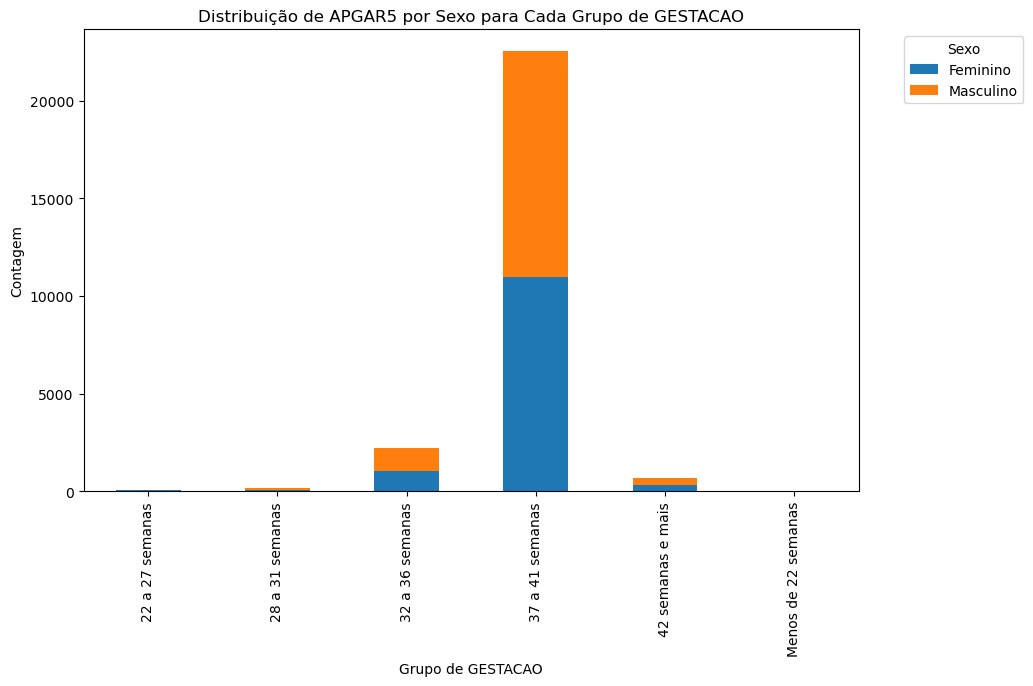

In [5]:
# Criar um DataFrame pivot para contar as ocorrências de cada combinação
pivot_data = filtered_data.pivot_table(index='GESTACAO', columns='SEXO', values='APGAR5', aggfunc='count')

# Plotar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Personalizar o gráfico
plt.title('Distribuição de APGAR5 por Sexo para Cada Grupo de GESTACAO')
plt.xlabel('Grupo de GESTACAO')
plt.ylabel('Contagem')
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:
# Criar a tabela cruzada
crosstab_data = pd.crosstab(sinasc_data['GESTACAO'], sinasc_data['APGAR5'], margins=True, margins_name='Total')

# Exibir a tabela cruzada
print(crosstab_data)

APGAR5               0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   8.0    9.0  \
GESTACAO                                                                   
22 a 27 semanas        7    0    8    6    1    0    2   10    24     19   
28 a 31 semanas        0    0    2    1    5    7    7   11    61     55   
32 a 36 semanas        2    2    2    2    8   11   17   56   362   1307   
37 a 41 semanas        5   20    3    5    7   21   45  151  1417  13565   
42 semanas e mais      1    0    0    0    0    1    1    5    44    423   
Menos de 22 semanas    1    0    1    0    0    0    0    1     0      3   
Total                 16   22   16   14   21   40   72  234  1908  15372   

APGAR5               10.0  Total  
GESTACAO                          
22 a 27 semanas         8     85  
28 a 31 semanas        13    162  
32 a 36 semanas       465   2234  
37 a 41 semanas      7284  22523  
42 semanas e mais     223    698  
Menos de 22 semanas     1      7  
Total                7994  25709  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [7]:
# Calcular os percentuais de linha
percentuais_linha = crosstab_data.div(crosstab_data['Total'], axis=0) * 100

# Exibir os percentuais de linha
print(percentuais_linha)

APGAR5                     0.0       1.0        2.0       3.0       4.0  \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   
Total                 0.062235  0.085573   0.062235  0.054456  0.081683   

APGAR5                    5.0       6.0        7.0        8.0        9.0  \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas     

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

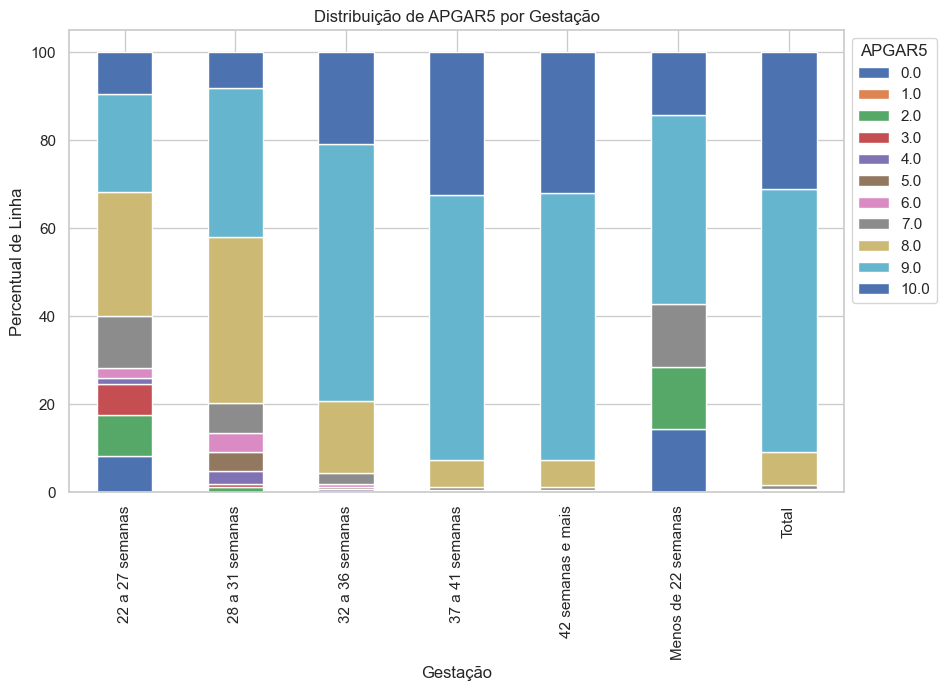

In [11]:
# Criar a tabela cruzada
crosstab_data = pd.crosstab(sinasc_data['GESTACAO'], sinasc_data['APGAR5'], margins=True, margins_name='Total')

# Calcular os percentuais de linha
percentuais_linha = crosstab_data.div(crosstab_data['Total'], axis=0) * 100

# Remover a coluna 'Total' dos percentuais de linha
percentuais_linha = percentuais_linha.drop(columns='Total')

# Criar o gráfico de barras
ax = percentuais_linha.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Percentual de Linha')
ax.set_xlabel('Gestação')
ax.set_title('Distribuição de APGAR5 por Gestação')

# Adicionar legenda
ax.legend(title='APGAR5', bbox_to_anchor=(1, 1))

# Exibir o gráfico
plt.show()

Corrobora, sim, a afirmacao dos medicos. Antes das 37 semanas, o APGAR5 esta igual ou baixo de 8 em 20% dos casos, e aumenta o porcentual de casos se nace nos meses anteriores

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [12]:
# Remover linhas com valores ausentes em 'APGAR5' ou 'PESO'
data_cleaned = sinasc_data.dropna(subset=['APGAR5', 'PESO'])

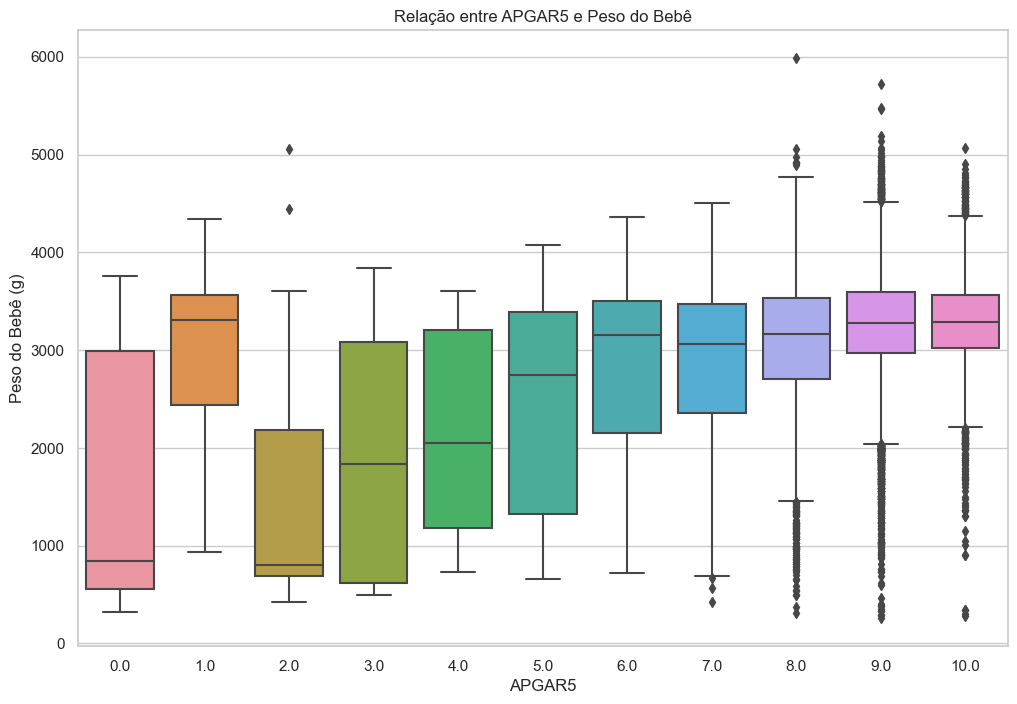

In [14]:
# Criar um boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='APGAR5', y='PESO', data=data_cleaned)
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (g)')
plt.show()

No 75% dos casos no APGAR5 o peso do bebe esta por cima de 2000g